In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting the url
athletes_records ={
                    'Womens Volleyball': ['https://bmccathletics.com/sports/womens-volleyball/roster?view=2','https://yorkathletics.com/sports/womens-volleyball/roster?view=2','https://hostosathletics.com/sports/womens-volleyball/roster','https://bronxbroncos.com/sports/womens-volleyball/roster/2021','https://queensknights.com/sports/womens-volleyball/roster','https://augustajags.com/sports/wvball/roster','https://flaglerathletics.com/sports/womens-volleyball/roster','https://pacersports.com/sports/womens-volleyball/roster','https://www.golhu.com/sports/womens-volleyball/roster'],
                    'Womens Swim': ['https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster?view=2', 'https://csidolphins.com/sports/womens-swimming-and-diving/roster?view=2','https://queensknights.com/sports/womens-swimming-and-diving/roster','https://yorkathletics.com/sports/womens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim','https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster','https://mckbearcats.com/sports/womens-swimming-and-diving/roster','https://ramapoathletics.com/sports/womens-swimming-and-diving/roster','https://keanathletics.com/sports/womens-swimming-and-diving/roster','https://oneontaathletics.com/sports/womens-swimming-and-diving/roster'],
                    'Mens Volleyball':['https://ccnyathletics.com/sports/mens-volleyball/roster','https://lehmanathletics.com/sports/mens-volleyball/roster','https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster','https://johnjayathletics.com/sports/mens-volleyball/roster','https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster','https://mecathletics.com/sports/mens-volleyball/roster','https://www.huntercollegeathletics.com/sports/mens-volleyball/roster','https://yorkathletics.com/sports/mens-volleyball/roster','https://ballstatesports.com/sports/mens-volleyball/roster'],
                    'Mens Swim':['https://csidolphins.com/sports/mens-swimming-and-diving/roster','https://yorkathletics.com/sports/mens-swimming-and-diving/roster','https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster','https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster','https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster','https://mckbearcats.com/sports/mens-swimming-and-diving/roster','https://ramapoathletics.com/sports/mens-swimming-and-diving/roster','https://oneontaathletics.com/sports/mens-swimming-and-diving/roster','https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22','https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22'],
                  }

In [3]:
# Define a function to scrape data and compile a dataframe
def scrape_and_compile_data(url_list, sport):
    scraped_names = []
    scraped_heights = []

    for url in url_list:
        page = requests.get(url)
        if page.status_code == 200:
            soup = BeautifulSoup(page.content, 'html.parser')
            raw_heights = soup.find_all('td', class_='height')
            names = soup.find_all('td', class_='sidearm-table-player-name')

            for x in range(len(raw_heights)):
                name = names[x].get_text().strip('\n')
                height = raw_heights[x].get_text()

                scraped_names.append(name)

                if height == '-':
                    height = np.nan
                else:
                    height = height.split('-')
                    feet = float(height[0])
                    inches = float(height[1])
                    height = feet * 12 + inches

                scraped_heights.append(height)


    athletes_heights = {'Names': scraped_names, 'Height': scraped_heights}
    athletes_heights_df = pd.DataFrame(athletes_heights)

    # Replace missing heights with the mean value
    mean_height = athletes_heights_df['Height'].mean()
    athletes_heights_df['Height'].fillna(mean_height, inplace=True)

    # Save the data to a CSV file
    athletes_heights_df.to_csv(f'{sport}_heights.csv', index=False)

    return athletes_heights_df, mean_height

average_heights = {}

# Loop through the sports and scrape data
for sport, urls in athletes_records.items():
    athletes_df, avg_height = scrape_and_compile_data(urls, sport)
    average_heights[sport] = avg_height

# Calculate the average height for each sport and print it
for sport, avg_height in average_heights.items():
    print(f'Average height for {sport}: {avg_height} inches')

Average height for Womens Volleyball: 67.664 inches
Average height for Womens Swim: 65.888 inches
Average height for Mens Volleyball: 72.21311475409836 inches
Average height for Mens Swim: 71.35714285714286 inches


In [4]:
avg_heights_data = {
    'Team Category': list(average_heights.keys()),
    'Avg Height': list(average_heights.values())
}

avg_heights_df = pd.DataFrame(avg_heights_data)

In [5]:
avg_heights_df


,Team Category,Avg Height
0,Womens Volleyball,67.664000
1,Womens Swim,65.888000
2,Mens Volleyball,72.213115
3,Mens Swim,71.357143


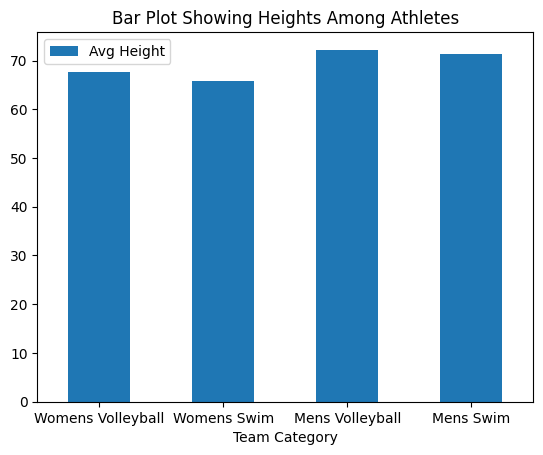

In [6]:
avg_heights_df.plot.bar(x='Team Category', y='Avg Height', rot=0, title='Bar Plot Showing Heights Among Athletes')
plt.show()